In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 2
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.01
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[2_10_51_300_0.01_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[2_10_51_300_0.01_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	29327788371.2735

Best Fitness:	3428928035.6563
Solution:	200.0000
Diff:		3428927835.6563

[0:00:04][----------] 1.96% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	26402563888.7725

Best Fitness:	4343843234.0134
Solution:	200.0000
Diff:		4343843034.0134

[0:00:08][----------] 3.92% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	27407957878.6362

Best Fitness:	8064295045.9934
Solution:	200.0000
Diff:		8064294845.9934

[0:00:13][#---------] 5.88% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	27170765261.6011

Best Fitness:	6387040885.9608
Solution:	200.0000
Diff:		6387040685.9608

[0:00:17][#---------] 7.84% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	28146255114.1648

Best Fitness:	4659334655.0175
Solution:	200.0000
Diff:		4659334455.0175

[0:00:21][#---------] 9.80% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	26048159628.2163

Best Fitness:	6121759574.1373
Solution:	200.0000
Diff:		6121759374.1373

[0:00:25][#---------] 11.76% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	26534773684.8031

Best Fitness:	2863582295.6610
Solution:	200.0000
Diff:		2863582095.6610

[0:00:29][#---------] 13.73% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	24911057283.8349

Best Fitness:	5906731645.1995
Solution:	200.0000
Diff:		5906731445.1995

[0:00:34][##--------] 15.69% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	23760354165.5558

Best Fitness:	3399958661.7733
Solution:	200.0000
Diff:		3399958461.7733

[0:00:38][##--------] 17.65% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	25968961356.7654

Best Fitness:	4470729241.5233
Solution:	200.0000
Diff:		4470729041.5233

[0:00:42][##--------] 19.61% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	28407857522.4316

Best Fitness:	6240967804.0290
Solution:	200.0000
Diff:		6240967604.0290

[0:00:46][##--------] 21.57% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	27730747186.9614

Best Fitness:	8082863129.1800
Solution:	200.0000
Diff:		8082862929.1800

[0:00:51][##--------] 23.53% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	26869865142.1316

Best Fitness:	2797521075.4115
Solution:	200.0000
Diff:		2797520875.4115

[0:00:55][###-------] 25.49% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	26194474562.4960

Best Fitness:	3528316897.8219
Solution:	200.0000
Diff:		3528316697.8219

[0:00:59][###-------] 27.45% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	26028644584.5881

Best Fitness:	6535697817.5420
Solution:	200.0000
Diff:		6535697617.5420

[0:01:01][###-------] 29.41% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	25892826675.8568

Best Fitness:	4160295286.2550
Solution:	200.0000
Diff:		4160295086.2550

[0:01:03][###-------] 31.37% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	25614792266.7480

Best Fitness:	4932400814.6810
Solution:	200.0000
Diff:		4932400614.6810

[0:01:04][###-------] 33.33% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	25835870678.2116

Best Fitness:	6023493508.8266
Solution:	200.0000
Diff:		6023493308.8266

[0:01:06][####------] 35.29% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	24383723441.4194

Best Fitness:	4501931919.0036
Solution:	200.0000
Diff:		4501931719.0036

[0:01:08][####------] 37.25% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	29471911861.4808

Best Fitness:	6673915907.8263
Solution:	200.0000
Diff:		6673915707.8263

[0:01:10][####------] 39.22% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	25930456454.0259

Best Fitness:	5205199278.7937
Solution:	200.0000
Diff:		5205199078.7937

[0:01:11][####------] 41.18% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	24424075820.3606

Best Fitness:	3320080738.8795
Solution:	200.0000
Diff:		3320080538.8795

[0:01:13][####------] 43.14% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	26127969970.9585

Best Fitness:	4167366728.3086
Solution:	200.0000
Diff:		4167366528.3086

[0:01:15][#####-----] 45.10% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	26917289674.8316

Best Fitness:	5011351103.2318
Solution:	200.0000
Diff:		5011350903.2318

[0:01:17][#####-----] 47.06% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	26071345830.0134

Best Fitness:	4297298219.5647
Solution:	200.0000
Diff:		4297298019.5647

[0:01:19][#####-----] 49.02% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	26227794696.5885

Best Fitness:	3512761847.8330
Solution:	200.0000
Diff:		3512761647.8330

[0:01:20][#####-----] 50.98% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	28219975457.0976

Best Fitness:	6886189106.0596
Solution:	200.0000
Diff:		6886188906.0596

[0:01:22][#####-----] 52.94% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	24795312728.6520

Best Fitness:	4633686735.9604
Solution:	200.0000
Diff:		4633686535.9604

[0:01:24][#####-----] 54.90% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	24261167876.4109

Best Fitness:	3924445070.1147
Solution:	200.0000
Diff:		3924444870.1147

[0:01:26][######----] 56.86% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	27243057616.8628

Best Fitness:	6402128459.8911
Solution:	200.0000
Diff:		6402128259.8911

[0:01:27][######----] 58.82% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	27657671112.9338

Best Fitness:	5636161620.8101
Solution:	200.0000
Diff:		5636161420.8101

[0:01:29][######----] 60.78% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	26084295617.3279

Best Fitness:	6782770330.4552
Solution:	200.0000
Diff:		6782770130.4552

[0:01:31][######----] 62.75% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	25966286642.4034

Best Fitness:	2895501078.5897
Solution:	200.0000
Diff:		2895500878.5897

[0:01:33][######----] 64.71% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	26889995136.2673

Best Fitness:	3800232140.4825
Solution:	200.0000
Diff:		3800231940.4825

[0:01:34][#######---] 66.67% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	27974609339.1303

Best Fitness:	5428045997.1322
Solution:	200.0000
Diff:		5428045797.1322

[0:01:36][#######---] 68.63% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	24027910303.3667

Best Fitness:	4922650224.6777
Solution:	200.0000
Diff:		4922650024.6777

[0:01:38][#######---] 70.59% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	28478416824.0146

Best Fitness:	3477957512.1560
Solution:	200.0000
Diff:		3477957312.1560

[0:01:40][#######---] 72.55% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	26226485965.0418

Best Fitness:	3160362170.8154
Solution:	200.0000
Diff:		3160361970.8154

[0:01:42][#######---] 74.51% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	27417574781.7885

Best Fitness:	4062324588.2724
Solution:	200.0000
Diff:		4062324388.2724

[0:01:44][########--] 76.47% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	26969939402.9710

Best Fitness:	4920401921.5914
Solution:	200.0000
Diff:		4920401721.5914

[0:01:45][########--] 78.43% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	25618604501.9667

Best Fitness:	4863404298.6323
Solution:	200.0000
Diff:		4863404098.6323

[0:01:47][########--] 80.39% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	27754291576.2850

Best Fitness:	6790024642.3373
Solution:	200.0000
Diff:		6790024442.3373

[0:01:49][########--] 82.35% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	26790151745.2340

Best Fitness:	3540976372.2358
Solution:	200.0000
Diff:		3540976172.2358

[0:01:51][########--] 84.31% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	25551261781.3613

Best Fitness:	5119682978.4537
Solution:	200.0000
Diff:		5119682778.4537

[0:01:52][#########-] 86.27% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	24523123375.5499

Best Fitness:	4454439535.7079
Solution:	200.0000
Diff:		4454439335.7079

[0:01:54][#########-] 88.24% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	26733055120.0472

Best Fitness:	3727379426.5174
Solution:	200.0000
Diff:		3727379226.5174

[0:01:56][#########-] 90.20% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	23696486401.7967

Best Fitness:	3962895865.5099
Solution:	200.0000
Diff:		3962895665.5099

[0:01:57][#########-] 92.16% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	26328022431.7595

Best Fitness:	5980009682.0168
Solution:	200.0000
Diff:		5980009482.0168

[0:01:59][#########-] 94.12% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	28341675689.1725

Best Fitness:	4908697099.4734
Solution:	200.0000
Diff:		4908696899.4734

[0:02:01][##########] 96.08% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	27143867234.5695

Best Fitness:	5943020197.3613
Solution:	200.0000
Diff:		5943019997.3613

[0:02:03][##########] 98.04% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	27533074613.2546

Best Fitness:	4639033317.5152
Solution:	200.0000
Diff:		4639033117.5152

[0:02:05][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

0:02:05

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
0,9.993095e+09,1.139631e+10,1.423521e+10,1.570186e+10,1.874550e+10,1.886652e+10,1.918530e+10,1.959440e+10,1.988966e+10,2.053549e+10,...,2.664829e+10,2.342860e+10,5.098304e+10,7.651801e+10,3.092569e+10,1.274936e+11,2.491464e+10,2.409003e+10,3.874399e+10,50
1,9.993095e+09,1.139631e+10,1.423521e+10,1.570186e+10,1.855924e+10,1.886652e+10,1.918530e+10,1.959440e+10,1.988966e+10,1.835793e+10,...,2.664829e+10,2.342860e+10,1.683593e+10,4.666907e+10,3.092569e+10,1.708079e+10,1.867992e+10,2.409003e+10,2.817198e+10,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 3428927835.6563406

Best error for run 1: 4343843034.013374

Best error for run 2: 8064294845.993408

Best error for run 3: 6387040685.960827

Best error for run 4: 4659334455.017549

Best error for run 5: 6121759374.137298

Best error for run 6: 2863582095.660967

Best error for run 7: 5906731445.199478

Best error for run 8: 3399958461.773281

Best error for run 9: 4470729041.523294

Best error for run 10: 6240967604.02897

Best error for run 11: 8082862929.180029

Best error for run 12: 2797520875.4115043

Best error for run 13: 3528316697.8218813

Best error for run 14: 6535697617.542015

Best error for run 15: 4160295086.255047

Best error for run 16: 4932400614.681043

Best error for run 17: 6023493308.826585

Best error for run 18: 4501931719.00361

Best error for run 19: 6673915707.826292

Best error for run 20: 5205199078.793717

Best error for run 21: 3320080538.879535

Best error for run 22: 4167366528.308623

Best error for run 23: 5011350903.231839

Best error for run 24: 4297298019.564691

Best error for run 25: 3512761647.8330135

Best error for run 26: 6886188906.059639

Best error for run 27: 4633686535.960409

Best error for run 28: 3924444870.114733

Best error for run 29: 6402128259.891064

Best error for run 30: 5636161420.810138

Best error for run 31: 6782770130.455185

Best error for run 32: 2895500878.5896773

Best error for run 33: 3800231940.482469

Best error for run 34: 5428045797.132156

Best error for run 35: 4922650024.677733

Best error for run 36: 3477957312.15595

Best error for run 37: 3160361970.8154197

Best error for run 38: 4062324388.272362

Best error for run 39: 4920401721.591382

Best error for run 40: 4863404098.632264

Best error for run 41: 6790024442.337328

Best error for run 42: 3540976172.235835

Best error for run 43: 5119682778.45371

Best error for run 44: 4454439335.707908

Best error for run 45: 3727379226.5174184

Best error for run 46: 3962895665.5099487

Best error for run 47: 5980009482.016792

Best error for run 48: 4908696899.473404

Best error for run 49: 5943019997.361338

Best error for run 50: 4639033117.515227

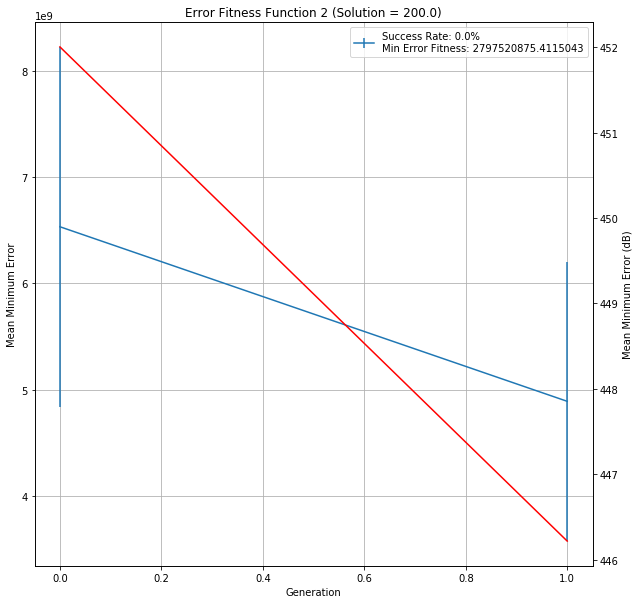

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[2_10_51_300_0.01_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,2,10,0.01,3.428928e+09,4.343843e+09,8.064295e+09,6.387041e+09,4.659334e+09,6.121759e+09,...,4.454439e+09,3.727379e+09,3.962896e+09,5.980009e+09,4.908697e+09,5.943020e+09,4.639033e+09,4.892158e+09,0:02:05,1200
